# Debug: `Buzzard.ini`

In [1]:
#!/usr/bin/env python
import os

import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rc('xtick', labelsize=20, top=True, direction='in')
matplotlib.rc('ytick', labelsize=20, right=True, direction='in')
matplotlib.rc('axes', linewidth=1, labelsize=20)
matplotlib.rc('xtick.major', size=5)
#matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=5)
#matplotlib.rc('ytick.minor', size=5)

## Load Files

In [3]:
root = '/global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/'
print(root)

/global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/


In [4]:
def get_block(model,col,dtype=None):
    return np.genfromtxt(root+'%s/%s.txt'%(model.lower(), col),dtype=dtype)

In [5]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/

avgwp		      correlationfunction      mass_function	 priors
cdm_baryon_power_lin  cosmological_parameters  matter_power_lin  recfast
cdm_baryon_power_nl   distances		       matter_power_nl	 shear
cluster_abundance     growth_parameters        mstar		 sigmacritinv
cmb_cl		      kappa		       numbercounts	 wp


### Radius bins

In [6]:
radius = np.round(np.logspace(np.log10(5.), np.log10(30.), 30),2)
radius

array([ 5.  ,  5.32,  5.66,  6.02,  6.4 ,  6.81,  7.24,  7.71,  8.2 ,
        8.72,  9.27,  9.87, 10.49, 11.16, 11.87, 12.63, 13.44, 14.29,
       15.2 , 16.17, 17.2 , 18.3 , 19.47, 20.71, 22.03, 23.43, 24.92,
       26.51, 28.2 , 30.  ])

In [7]:
wall_numbers = " ".join(map(str,radius))
wall_numbers

'5.0 5.32 5.66 6.02 6.4 6.81 7.24 7.71 8.2 8.72 9.27 9.87 10.49 11.16 11.87 12.63 13.44 14.29 15.2 16.17 17.2 18.3 19.47 20.71 22.03 23.43 24.92 26.51 28.2 30.0'

In [8]:
radius3 = np.tile(radius,3)
wall_numbers = " ".join(map(str, list(radius3)))
wall_numbers

'5.0 5.32 5.66 6.02 6.4 6.81 7.24 7.71 8.2 8.72 9.27 9.87 10.49 11.16 11.87 12.63 13.44 14.29 15.2 16.17 17.2 18.3 19.47 20.71 22.03 23.43 24.92 26.51 28.2 30.0 5.0 5.32 5.66 6.02 6.4 6.81 7.24 7.71 8.2 8.72 9.27 9.87 10.49 11.16 11.87 12.63 13.44 14.29 15.2 16.17 17.2 18.3 19.47 20.71 22.03 23.43 24.92 26.51 28.2 30.0 5.0 5.32 5.66 6.02 6.4 6.81 7.24 7.71 8.2 8.72 9.27 9.87 10.49 11.16 11.87 12.63 13.44 14.29 15.2 16.17 17.2 18.3 19.47 20.71 22.03 23.43 24.92 26.51 28.2 30.0'

In [9]:
z_wall = np.repeat([0.2, 0.373, 0.51],30)
z_wall_numbers = " ".join(map(str, list(z_wall)))
z_wall_numbers

'0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.373 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51'

In [10]:
z_wall = np.repeat([0.32, 0.51, 0.64],30)
z_wall_numbers = " ".join(map(str, list(z_wall)))
z_wall_numbers

'0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64'

## Debug Wp

In [11]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/correlationfunction/

bias.txt	  k.txt    r_sigma.txt	scale_shift.txt  wp_hh.txt   xi_nfw.txt
damped_pk_hh.txt  lnm.txt  r_xi.txt	sigma_hh.txt	 wp_nfw.txt  z.txt
hubble_shift.txt  m_h.txt  rp.txt	sigma_nfw.txt	 xi_hh.txt


In [12]:
r = get_block("correlationfunction", "r_xi")
wp_hh = get_block("correlationfunction", "wp_hh")
wp_nfw = get_block("correlationfunction", "wp_nfw")

xi_hh = get_block("correlationfunction", "xi_hh", dtype='d')
xi_nfw = get_block("correlationfunction", "xi_nfw")

In [13]:
k_l = get_block("matter_power_lin", "k_h")
pk = get_block("matter_power_lin", "p_k")
k_nl = get_block("matter_power_nl", "k_h")
pk_nl = get_block("matter_power_nl", "p_k")

In [14]:
path = '/global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/'
pk_t, k = np.load(path+'pk_nl.npz')['pk'], np.load(path+'pk_nl.npz')['k']
rh, xi_h = np.load(path+'xi_hankl_nl.npz')['r'], np.load(path+'xi_hankl_nl.npz')['pk']
rc, xi_c = np.load(path+'xi_ct_nl.npz')['r'], np.load(path+'xi_ct_nl.npz')['pk']

In [15]:
# rh

(20.0, 200.0)

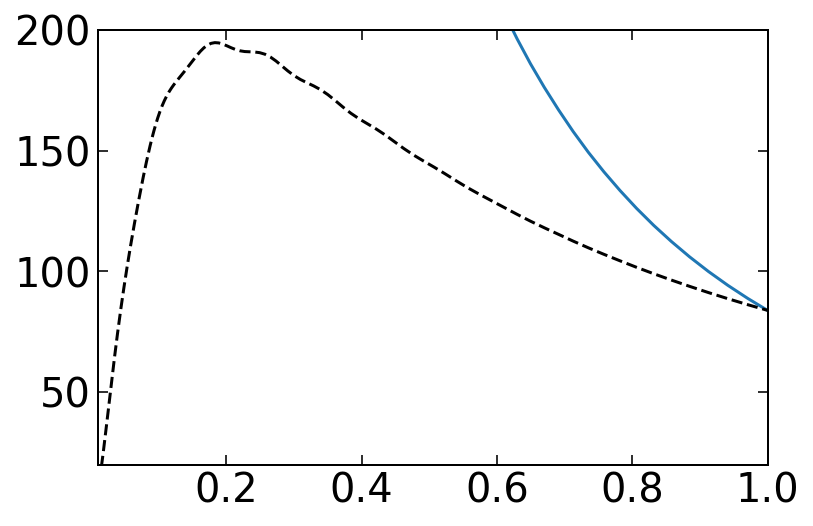

In [32]:
# plt.loglog()
plt.plot(k, pk_t)
plt.plot(k_l, k_l*pk[25], 'k--')
plt.xlim(0.01, 1.)
plt.ylim(20, 200)
# the pk matches [input ok]

In [17]:
import hankl
import cluster_toolkit as ct
from scipy.interpolate import interp1d

rh2, xi_h2 = hankl.P2xi(k, pk_t, 0)
xi_c2 = ct.xi.xi_mm_at_r(rc, k, pk_t)

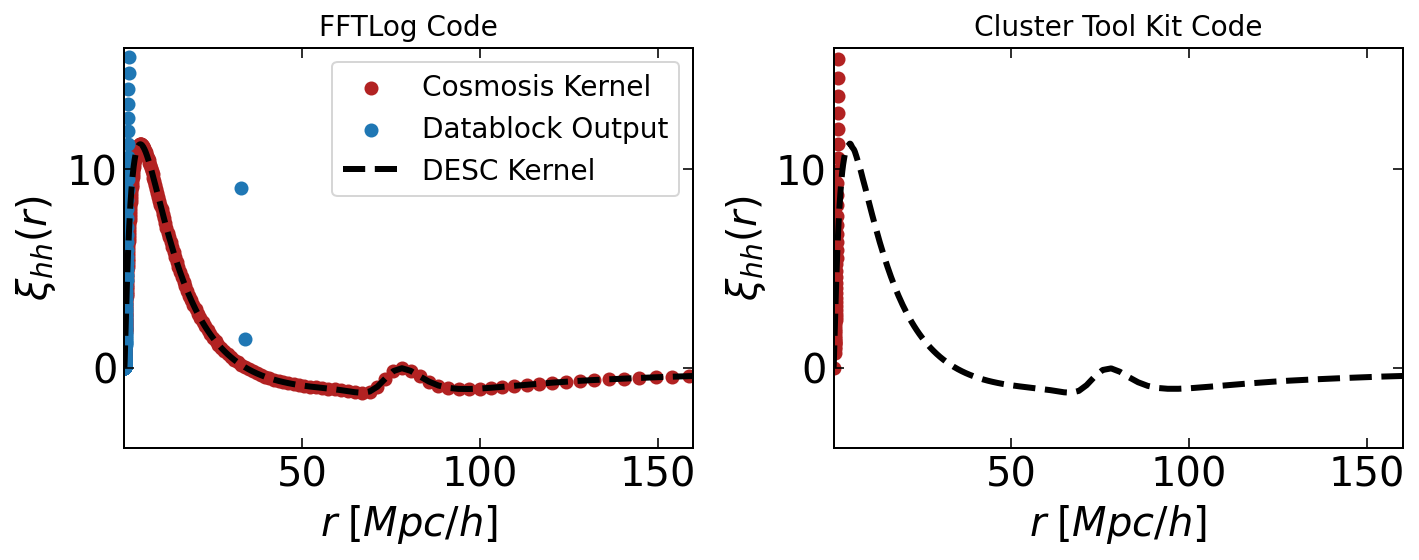

In [18]:
fig = plt.figure(figsize=(10,4))

ylims = (-10.088602926598204/2.5, 40.322178988656034/2.5)

plt.subplot(1,2,1)
plt.scatter(rh, rh*rh*xi_h.real,color='firebrick',label='Cosmosis Kernel')
plt.scatter(r, r*r*xi_hh[25],color='tab:blue',label='Datablock Output')
plt.plot(rh2, rh2*rh2*xi_h2.real,'k--',lw=3, label='DESC Kernel')
plt.xlim(0.007, 160.)
plt.ylim(*ylims)
# ylims = plt.gca().get_ylim()
plt.xlabel(r'$r \; [Mpc/h]$')
plt.ylabel(r'$\xi_{hh}(r)$')
plt.legend(fontsize=14)
plt.title('FFTLog Code',fontsize=14)

plt.subplot(1,2,2)
plt.scatter(rc, rc*rc*xi_c,color='firebrick',label='Cosmosis Kernel')
plt.plot(rc, rc*rc*xi_c2,'k--',lw=3, label='DESC Kernel')
plt.xlim(0.007, 160.)
plt.ylim(*ylims)
plt.title('Cluster Tool Kit Code',fontsize=14)
plt.xlabel(r'$r \; [Mpc/h]$')
plt.ylabel(r'$\xi_{hh}(r)$')
fig.tight_layout()
plt.savefig('debug_xi_datablock.png',transparent=False,facecolor='w',dpi=125)
# plt.title('Another Python Kernel', fontsize=14)

/tmp/ipykernel_40917/3843990697.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(*ylims)


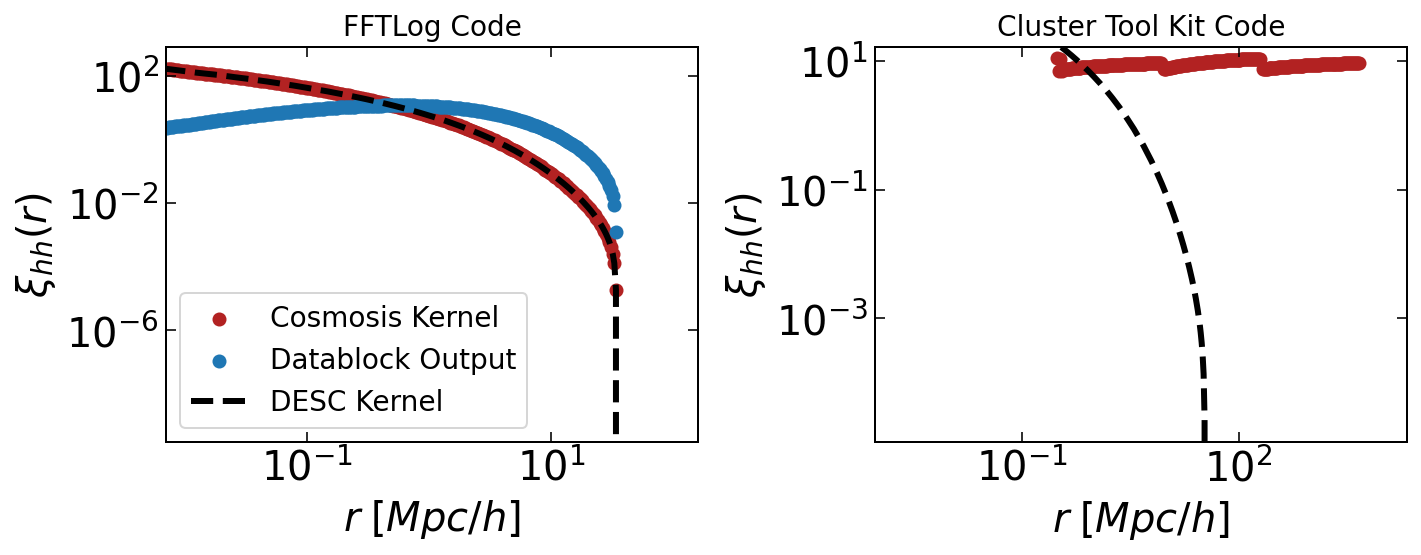

In [21]:
fig = plt.figure(figsize=(10,4))

ylims = (-10.088602926598204/2.5, 40.322178988656034/2.5)

plt.subplot(1,2,1)
plt.loglog()
plt.scatter(rh, xi_h.real,color='firebrick',label='Cosmosis Kernel')
plt.scatter(r, xi_hh[25],color='tab:blue',label='Datablock Output')
plt.plot(rh2, xi_h2.real,'k--',lw=3, label='DESC Kernel')
plt.xlim(0.007, 160.)
# plt.ylim(*ylims)
# ylims = plt.gca().get_ylim()
plt.xlabel(r'$r \; [Mpc/h]$')
plt.ylabel(r'$\xi_{hh}(r)$')
plt.legend(fontsize=14)
plt.title('FFTLog Code',fontsize=14)

plt.subplot(1,2,2)
plt.loglog()
plt.scatter(rc, xi_c,color='firebrick',label='Cosmosis Kernel')
plt.plot(rc, xi_c2,'k--',lw=3, label='DESC Kernel')
# plt.xlim(0.007, 160.)
plt.ylim(*ylims)
plt.title('Cluster Tool Kit Code',fontsize=14)
plt.xlabel(r'$r \; [Mpc/h]$')
plt.ylabel(r'$\xi_{hh}(r)$')
fig.tight_layout()
plt.savefig('debug_xi_datablock.png',transparent=False,facecolor='w',dpi=125)
# plt.title('Another Python Kernel', fontsize=14)

NameError: name 'rh3' is not defined

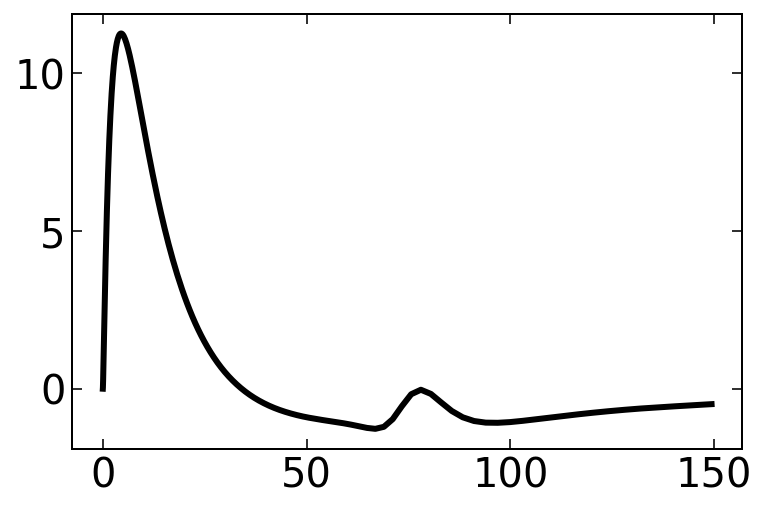

In [22]:
w, = np.where( (r<150)&(r>0.001) )
wh, = np.where( (rh<150)&(rh>0.001) )

plt.plot(rh[wh], rh[wh]*rh[wh]*xi_h.real[wh], color='k', lw=3,label='Expected Value')

for i in [5, 25, 50, 75]:
    plt.plot(rh3[w], rh3[w]*rh3[w]*xi_hh[i][w])

plt.legend(fontsize=14)
# w, = np.where( (rh<150)&(rh>0.001) )
# for i in [5, 25, 50, 75]:
#     rh3, xi_h3 = hankl.P2xi(k, pk[i], 0)
#     plt.plot(rh3[w], rh3[w]*rh3[w]*xi_h3.real[w], '--',label='Cosmosis Kernel')

In [ ]:
plt.loglog()
plt.plot(k, pk[25])
plt.plot(k, pk_nl[25])

In [ ]:
def P2Wp(k, P, l, n=0, lowring=False, ext=0, range=None, return_ext=False):
    r, f = hankl.FFTLog(k, P * k ,
                  q=-n,
                  mu=l,
                  lowring=lowring,
                  ext=ext,
                  range=range,
                  return_ext=return_ext,
                  )
    return r, f * (2.0 * np.pi) ** (-1) * r ** (-1.) * (1j) ** l

def compute_abell_transform(r, fr, pimax=100., int_func=np.trapz):
    # Computes Wp(R) = \int \xi(\sqrt{R^2+\pi^2}) d\pi
    # Switch to the r coordinates.
    fr *= 2*r

    # if is_uniform_sampling(r):
    #     int_opts = {'dx': abs(r[1] - r[0])}
    # else:
    int_opts = {'x': r}

    # Initializiate output
    out = np.zeros(fr.size)

    # Initialize grid
    R, rr = np.meshgrid(r, r, indexing='ij')
    i_vect = np.arange(len(r), dtype=int)
    II, JJ = np.meshgrid(i_vect, i_vect, indexing='ij')

    # Set integration limits
    # only for R < r <= rmax 
    mask = (II < JJ)
    mask &= (rr <= np.sqrt(R**2 + pimax**2))

    I_sqrt = np.zeros(R.shape)
    I_sqrt[mask] = np.sqrt((rr**2 - R**2)[mask])

    I_isqrt = np.zeros(R.shape)
    I_isqrt[mask] = 1./I_sqrt[mask]

    # create a mask that just shows the first two points of the integral
    mask2 = ((II > JJ-2) & (II < JJ+1))
    
    # perfom the integration
    Integrand = fr[None, :] * I_isqrt  # set up the integral
    out = int_func(Integrand, axis=1, **int_opts)  # take the integral
    # correct for the extra triangle at the start of the integral
    #out = out - 0.5*int_func(Integrand*mask2, axis=1, **int_opts)

    return out

In [ ]:
from scipy.integrate import simps

wh3, = np.where( (rh<30)&(rh>1.) )
rh2, w_h2 = P2Wp(k, pk_t, 0)
w_h3 = compute_abell_transform(rh[wh3], xi_h.real[wh3], pimax=10., int_func=simps)

In [ ]:
w, = np.where( (r<30)&(r>3.) )
# plt.loglog()
plt.plot(r[w], r[w]*wp_hh[25][w])

w, = np.where( (rh<30)&(rh>3.) )
plt.plot(rh2[w], rh2[w]*w_h2[w].real)
# plt.plot(rbins, recon)
# plt.plot(rh2[wh3], rh2[wh3]*w_h3)

## Average Wp(R)

In [ ]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/avgwp

In [ ]:
Rp = get_block("avgwp", "gridpoints")[:30,2]
avgWp = get_block("avgwp", "vals")
avgWp = avgWp.reshape(4*3,Rp.size)

# wp_nfw = get_block("correlationfunction", "wp_nfw")


In [ ]:
plt.loglog()
for i in range(12):
    plt.plot(Rp, avgWp[i]/1e7 + 1.2)

## Plot Profiles

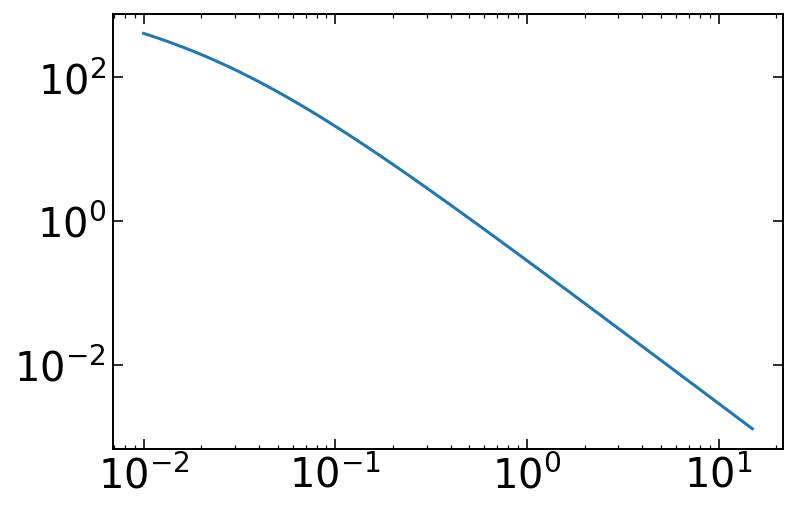

In [23]:
rsigma = get_block("correlationfunction", "r_sigma") 
sigma = get_block("correlationfunction", "sigma_nfw") 
plt.loglog()
plt.plot(rsigma, sigma[11])

## Kappa

In [24]:
kappa = get_block("kappa", "vals")
kappa = kappa.reshape(12, 30)

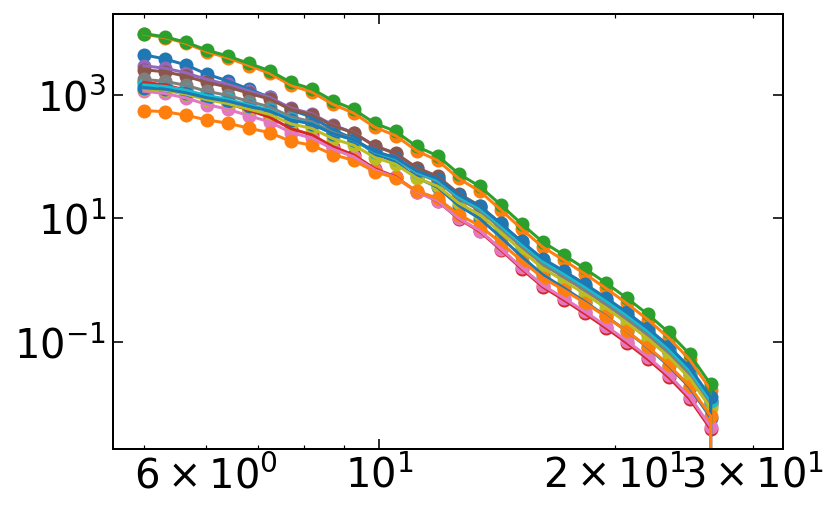

In [25]:
plt.loglog()
# plt.xscale('log')
for i in range(12):
    p = plt.plot(radius, kappa[i])
    plt.scatter(radius, kappa[i], color=p[0].get_color())

In [26]:
from scipy import integrate

def compute_mean_profile(r, fx, rmin=0.1):
    """Computes \Delta f(x) = <f(<x)> - f(x)
    
    Average profiles excess of f(x) 
    Example: f(x) = \Sigma
    """
    # start the integration
    profile = interp1d(r, fx, fill_value='extrapolate')
    
    delta_profile = np.full(r.size, np.nan)
    for ii, ri in enumerate(r):
        if ri>rmin:
            #delta_profile[ii] = integrate.quad(profile, 0.001, ri)[0]/ri - profile(ri)
            delta_profile[ii] = integrate.simps(fx[r<=ri], x=r[r<=ri])/ri - profile(ri)
    return delta_profile

In [27]:
shear = get_block("shear", "shear_cen")
rshear = get_block("shear", "r")
tshear = get_block("shear", "theta")
shear.shape
# kappa = kappa.reshape(12, 10)

(12, 100)

In [28]:
kw = {'dS':r'$\Delta \Sigma \, \, [M_{\odot}]$',
      'gamma': r'$\left< \gamma_t(\theta) \right>$',
      'physical':r'$\rm R_p\ [Mpc]$',
      'angle': r'$\theta \; [arcmin]$'
     }

def plot_profile(x,px,ax=None,xcol='physical',**kwargs):
    if ax is None: ax = plt.gca()
    ax.loglog()
    ax.plot(x,px,**kwargs)
    ax.set_xlabel(kw[xcol])
    

In [29]:
lbdbins =  np.array([5, 15, 25, 40, 160])
lam_low = lbdbins[:-1]
lam_hig = lbdbins[1:]

zmin_list = np.array([0.2, 0.373, 0.51])
zmax_list = np.array([0.32, 0.51, 0.64])

In [30]:
labels = {'lam': [r'$%i < \lambda < %i$'%(llow, lhig) for llow, lhig in zip(lam_low, lam_hig)],
          'z': [r'$%.2f < z < %.2f$'%(zl, zh) for zl, zh in zip(zmin_list, zmax_list)]}

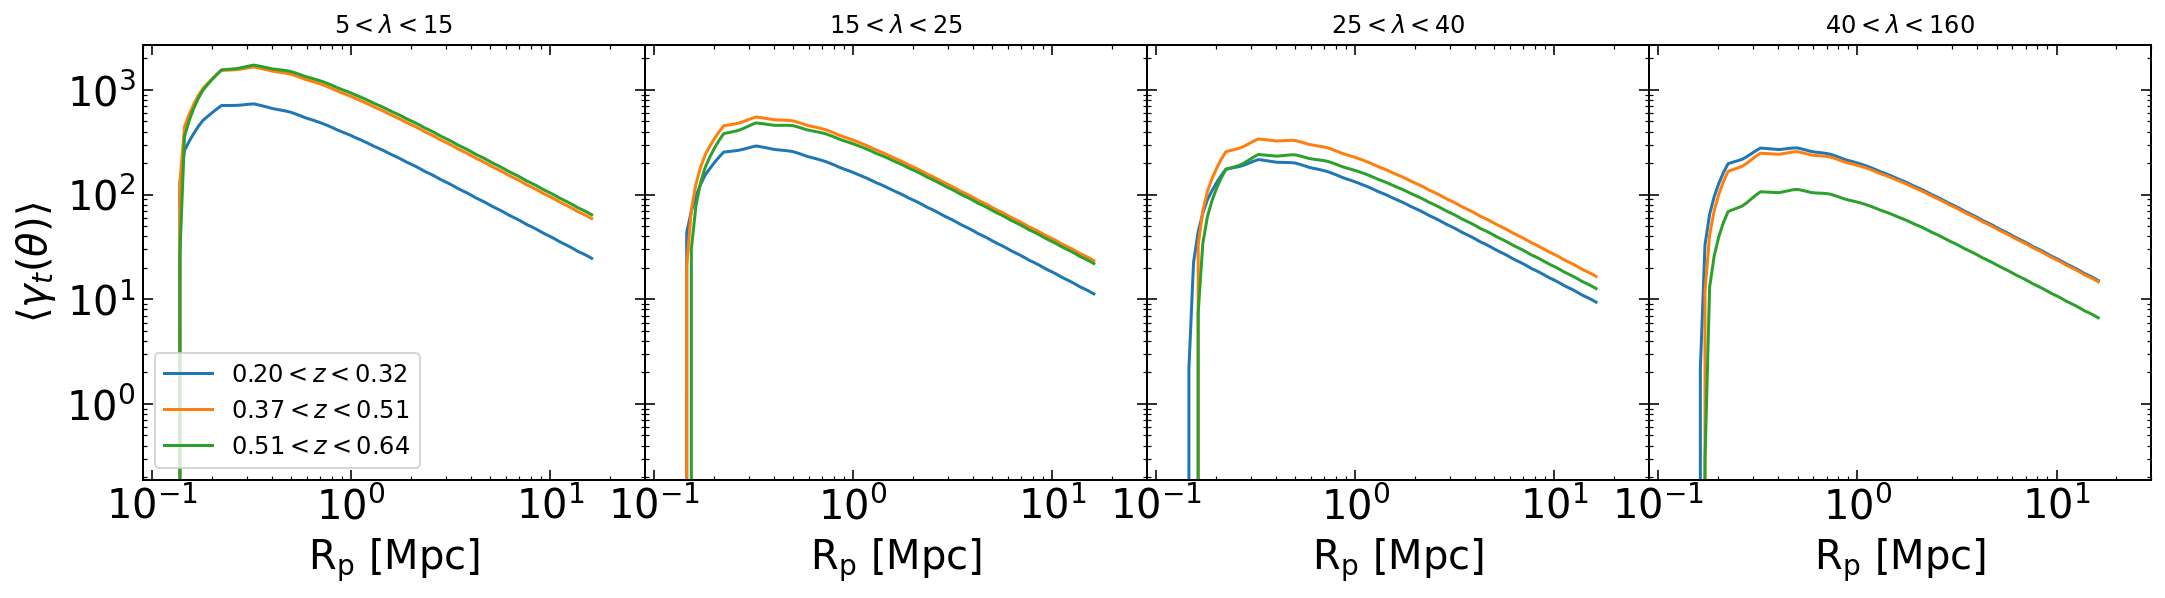

In [33]:
theta = tshear.reshape(4, 3, 100)
gt_stack = shear.reshape(4, 3, 100)

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(4*4+2, 4), gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(4):
        ax = axes[i]
        label = None
        for j in range(3):
            if i==0: label=labels['z'][j]
            #plot_profile(theta[i][j], gt_stack[i][j],ax=ax,xcol='angle',label=label)
            plot_profile(rshear, gt_stack[i][j],ax=ax,label=label)
        ax.set_title(labels['lam'][i])
axes[0].set_xlim(9e-2, 30)
axes[0].set_ylabel(kw['gamma'])
axes[0].legend(fontsize=12,loc=3)
# fig.suptitle('Stacked Profiles in Angle Units')

In [29]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/growth_parameters

a.txt	 da.txt    f_z.txt	 h.txt	    sigma_8.txt
d_z.txt  f_ap.txt  fsigma_8.txt  rs_dv.txt  z.txt


In [30]:
## Hubble evolution
z = np.genfromtxt(path+'growth_parameters/z.txt')
hz = np.genfromtxt(path+'growth_parameters/h.txt')

/tmp/ipykernel_20356/685748946.py:2: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(z, hz[0]*np.sqrt(1-0.3*(1+z)**3))


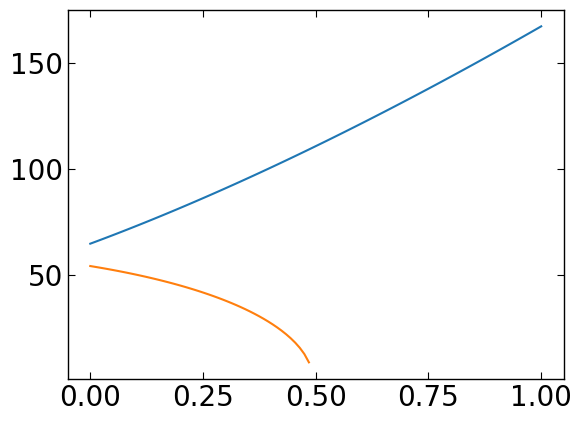

In [31]:
plt.plot(z, hz)
plt.plot(z, hz[0]*np.sqrt(1-0.3*(1+z)**3))

### Debug Sigma Crit Inv

In [32]:
!ls /global/common/software/des/jesteves/y3_cluster_cpp/y3_buzzard/datablock_0/correlationfunction/

bias.txt	  k.txt    r_sigma.txt	scale_shift.txt  wp_hh.txt   xi_nfw.txt
damped_pk_hh.txt  lnm.txt  r_xi.txt	sigma_hh.txt	 wp_nfw.txt  z.txt
hubble_shift.txt  m_h.txt  rp.txt	sigma_nfw.txt	 xi_hh.txt


In [33]:
r = np.genfromtxt(path+'sigmacritinv/r_sigma.txt')
sigC = np.genfromtxt(path+'sigmacritinv/sigma_crit_inv.txt')
sigC[11,:10]
# plt.plot(r, sigC)

array([0.00022534, 0.00022534, 0.00022534, 0.00022534, 0.00022534,
       0.00022534, 0.00022534, 0.00022534, 0.00022534, 0.00022534])